# **4-xT**

## **Data : Opta**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime

# Import packages
from urllib.request import urlopen, Request
# Import packages
import requests
from bs4 import BeautifulSoup


In [6]:
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Prem 24-25\ENG1-2425.csv'
# file_path = r"C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Scraper\Prem23-24.csv"
# file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Data\Prem22-23.csv'
main_data = pd.read_csv(file_path, low_memory=False)
main_data["Match Name"] = main_data["Home"]+main_data["Away"]
len(main_data["Match Name"].unique())
# # Now you can safely extract the 'value' as before
# main_data['period'] = main_data['period'].apply(lambda x: x['value'] if isinstance(x, dict) and 'value' in x else None)
event_df = main_data.copy()

In [13]:
# Carries xT
dummy = event_df[(event_df.type == "Carry")]
agg_datac = dummy.groupby('Name').agg(
    carry_count=('type', lambda x: (x == 'Carry').sum()),
    prog_carry_count=('prog_carry', 'sum'),
    xT_C=('xThreat_gen', 'sum')
).reset_index()


In [14]:
agg_datac

,Name,carry_count,prog_carry_count,xT_C
0,Aaron Cresswell,16,1,0.017097
1,Aaron Ramsdale,148,8,0.049757
2,Aaron Wan-Bissaka,218,64,0.861579
3,Abdoulaye Doucouré,155,28,0.542184
4,Abdukodir Khusanov,22,0,0.003372
...,...,...,...,...
496,Yukinari Sugawara,173,31,0.461448
497,Yunus Konak,7,0,0.007850
498,Yves Bissouma,216,35,0.248578
499,Zain Silcott-Duberry,1,0,0.006804


In [15]:
#
dummyp = event_df[(event_df.type == "Pass")]
agg_datap = dummyp.groupby('Name').agg(
    passes_count=('type', lambda x: (x == 'Pass').sum()),
    xT_P=('xThreat_gen', 'sum')
).reset_index()

In [16]:
agg_datap


,Name,passes_count,xT_P
0,Aaron Cresswell,93,0.354228
1,Aaron Ramsdale,634,1.098209
2,Aaron Wan-Bissaka,995,2.802803
3,Abdoulaye Doucouré,593,0.808241
4,Abdukodir Khusanov,48,0.028923
...,...,...,...
508,Yukinari Sugawara,697,3.356669
509,Yunus Konak,17,0.022182
510,Yves Bissouma,607,1.076049
511,Zain Silcott-Duberry,2,0.001173


In [17]:
agg_datap = agg_datap.merge(agg_datac[['Name','carry_count','prog_carry_count','xT_C']], on=['Name'], how='left')

In [18]:
agg_datap

,Name,passes_count,xT_P,carry_count,prog_carry_count,xT_C
0,Aaron Cresswell,93,0.354228,16.0,1.0,0.017097
1,Aaron Ramsdale,634,1.098209,148.0,8.0,0.049757
2,Aaron Wan-Bissaka,995,2.802803,218.0,64.0,0.861579
3,Abdoulaye Doucouré,593,0.808241,155.0,28.0,0.542184
4,Abdukodir Khusanov,48,0.028923,22.0,0.0,0.003372
...,...,...,...,...,...,...
508,Yukinari Sugawara,697,3.356669,173.0,31.0,0.461448
509,Yunus Konak,17,0.022182,7.0,0.0,0.007850
510,Yves Bissouma,607,1.076049,216.0,35.0,0.248578
511,Zain Silcott-Duberry,2,0.001173,1.0,0.0,0.006804


In [19]:
agg_datap = agg_datap[['Name','xT_P','xT_C']]

In [20]:
agg_datap

,Name,xT_P,xT_C
0,Aaron Cresswell,0.354228,0.017097
1,Aaron Ramsdale,1.098209,0.049757
2,Aaron Wan-Bissaka,2.802803,0.861579
3,Abdoulaye Doucouré,0.808241,0.542184
4,Abdukodir Khusanov,0.028923,0.003372
...,...,...,...
508,Yukinari Sugawara,3.356669,0.461448
509,Yunus Konak,0.022182,0.007850
510,Yves Bissouma,1.076049,0.248578
511,Zain Silcott-Duberry,0.001173,0.006804


In [27]:
agg_datap.dropna(inplace=True)


C:\Users\lolen\AppData\Local\Temp\ipykernel_10568\2360005254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_datap.dropna(inplace=True)


In [28]:
test3 = agg_datap

In [31]:
test3.sort_values("xT_C")

,Name,xT_P,xT_C
425,Ronnie Edwards,0.001309,0.000000
85,Chiquinho,0.089846,0.000000
340,Matt Targett,0.002973,0.000000
171,Harrison Reed,0.156280,0.000000
108,Danilo,0.000593,0.000000
...,...,...,...
32,Antoine Semenyo,2.707089,2.205488
263,Jérémy Doku,1.798068,2.226728
446,Savinho,3.395404,2.403515
379,Noni Madueke,2.464715,2.645910


In [32]:
test3.sort_values("xT_P")

,Name,xT_P,xT_C
432,Ryan Sessegnon,0.000000,0.002785
326,Martial Godo,0.000000,0.007157
39,Asher Agbinone,0.000000,0.030139
493,Will Alves,0.000000,0.003218
70,Callum Wilson,0.000240,0.011775
...,...,...,...
288,Leif Davis,6.459378,0.662731
66,Bukayo Saka,6.733544,2.046674
118,Declan Rice,7.057133,1.097059
507,Youri Tielemans,7.192998,0.460749


In [33]:
test3 = test3.drop_duplicates()

In [51]:
test3 = test3.reset_index(drop= True)

In [52]:
test3

,Name,xT_P,xT_C
0,Aaron Cresswell,0.354228,0.017097
1,Aaron Ramsdale,1.098209,0.049757
2,Aaron Wan-Bissaka,2.802803,0.861579
3,Abdoulaye Doucouré,0.808241,0.542184
4,Abdukodir Khusanov,0.028923,0.003372
...,...,...,...
496,Yukinari Sugawara,3.356669,0.461448
497,Yunus Konak,0.022182,0.007850
498,Yves Bissouma,1.076049,0.248578
499,Zain Silcott-Duberry,0.001173,0.006804


## **Prepping Plot**

## Creating zones

In [53]:
nine = test3.quantile(0.95)
nine

C:\Users\lolen\AppData\Local\Temp\ipykernel_10568\2889413374.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nine = test3.quantile(0.95)


xT_P    4.733882
xT_C    1.398173
Name: 0.95, dtype: float64

In [54]:
X = nine[0]
Y = nine[1]

### **Green Zone**

In [55]:
green = test3[(test3["xT_P"]> X) & (test3["xT_C"] > Y)]
green_list = list(green.iloc[:,0])
green_list

['Alex Iwobi',
 'Anthony Gordon',
 'Bryan Mbeumo',
 'Bukayo Saka',
 'Cole Palmer',
 'Jarrod Bowen',
 'Mohamed Salah']

In [56]:
green

,Name,xT_P,xT_C
13,Alex Iwobi,5.416488,1.695440
30,Anthony Gordon,5.375791,2.150485
63,Bryan Mbeumo,6.102415,1.738910
64,Bukayo Saka,6.733544,2.046674
90,Cole Palmer,6.442430,1.747402
216,Jarrod Bowen,5.020680,1.635799
346,Mohamed Salah,5.322162,2.923004


## **Red Zone**

In [57]:
red = test3[(test3["xT_P"] < X) & (test3["xT_C"] > Y)]
red = red.sort_values("xT_C",ascending=[False])
red_list = list(red.iloc[0:10,0])


In [58]:
red_list

['Noni Madueke',
 'Savinho',
 'Jérémy Doku',
 'Antoine Semenyo',
 'Kaoru Mitoma',
 'Son Heung-Min',
 'Amad Diallo',
 'Dejan Kulusevski',
 'Luis Díaz',
 'Alejandro Garnacho']

In [63]:
red_list = red_list[:5]

## **Blue Zone**

In [59]:
blue = test3[(test3["xT_P"] > X) & (test3["xT_C"] < Y)]
blue = blue.sort_values("xT_P",ascending=[False])
blue_list = list(blue.iloc[:10,0])

In [60]:
blue_list

['Trent Alexander-Arnold',
 'Youri Tielemans',
 'Declan Rice',
 'Leif Davis',
 'Lewis Hall',
 'Kevin De Bruyne',
 'Pedro Porro',
 'Bruno Fernandes',
 'Dwight McNeil',
 'Andy Robertson']

In [62]:
blue_list =blue_list[:5]

# **Creating Plot**`

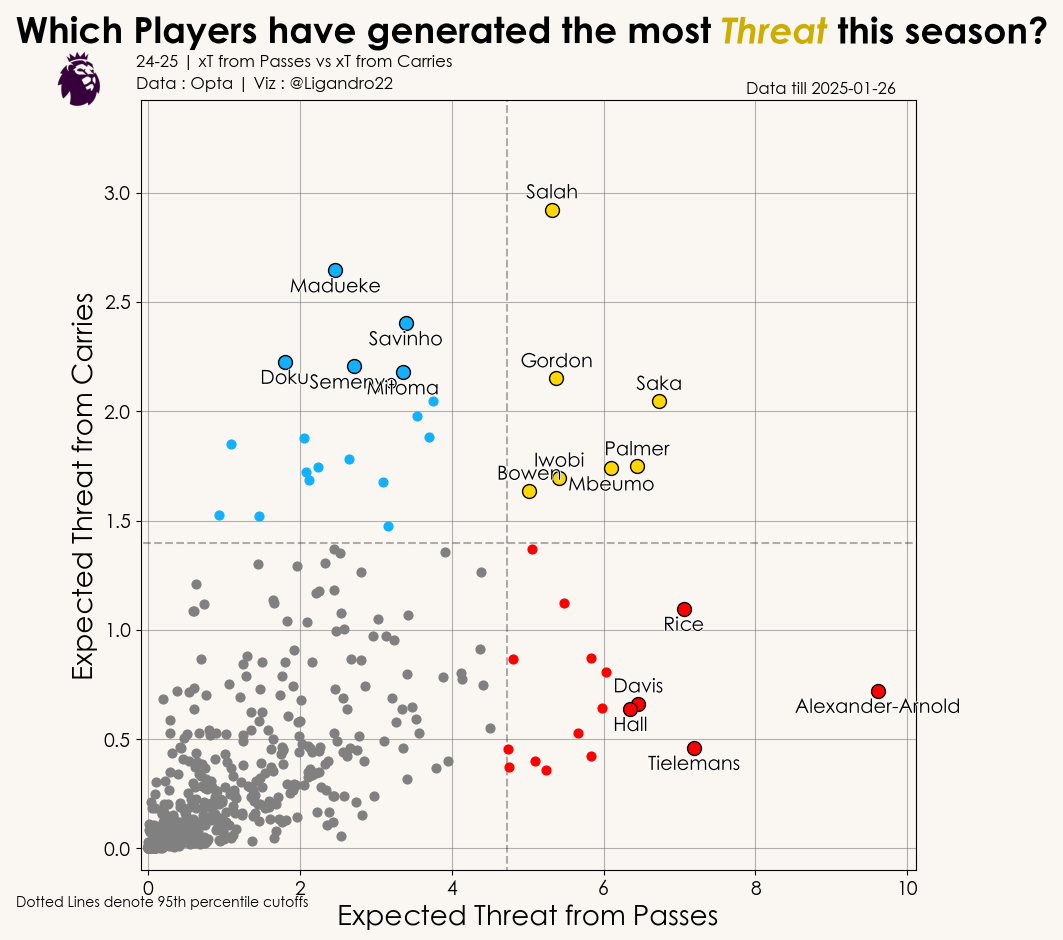

In [79]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = plt.subplot()


ax.set_ylim(test3.xT_C.min()-0.1, test3.xT_C.max()+0.5)
ax.set_xlim(test3.xT_P.min()-0.1,test3.xT_P.max()+0.5)

x = datetime.datetime.now()
x = str(x)
date = x[:10]

f = "STXihei"
color1="#FAF7F3"
fig.set_facecolor(color1)
ax.patch.set_facecolor(color1)


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.xticks(fontname = "STXihei",color="black")
plt.yticks(fontname = "STXihei",color="black")

# Add spines
ax.spines["left"].set_color('black')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('black')

# Add grid and axis labels
ax.grid(True, color = "grey", ls = "-",alpha=0.6) #ls = linestyle,




plt.ylabel("Expected Threat from Carries",font =f,fontsize = 20,color="black")
plt.xlabel("Expected Threat from Passes",font =f ,fontsize = 20,color= "black")
ax.tick_params(labelsize=14)
          
   


for y,z,n in zip(test3["xT_P"],test3["xT_C"],test3["Name"] ): 
    if y < X and z > Y:
        if n in red_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#13B0FE",zorder = 3,ec = "#000000")
        else :
            ax.scatter(y,z,s = 40, alpha = 1,color= "#13B0FE",zorder = 3)
    if z < Y and y>X:
        if n in blue_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#FF0000",zorder = 3,ec = "#000000")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3)
    if z > Y and y > X:
        if n in green_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#FFD700",zorder = 3,ec = "#000000")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FFD700",zorder = 3)
    if z < Y and y < X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "grey",zorder = 3)


# add text
for i,txt in enumerate(red_list):
    j = test3.index[test3["Name"] == txt ].tolist()
    j = j[0]
    t = txt.split(" ")
    n = len(t)
    if txt in ['Vinícius Júnior','K. Mbappé','M. Thuram',
                  'E. Haaland','Gabriel Jesus','Gabriel Martinelli']:
        y_pos = 12
    else:
        y_pos = -12
    if txt in ["S. Mané"]:
        x_pos = 27
        y_pos = 0
    else:
        x_pos = 0
    ax.annotate(
        xy = (test3.iloc[j,1], test3.iloc[j,2]),
        text = t[n-1],
        ha = "center",
        va = "center",
        xytext = (x_pos,y_pos),
        textcoords = "offset points",
        color="black",size =14,fontname=f,fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
        )
    
for i,txt in enumerate(blue_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["Name"]== txt ].tolist()
    j = j[0]
    if txt in ['Leif Davis']:
        y_pos = 12
    else:
        y_pos = -12
    ax.annotate(
        xy = (test3.iloc[j,1], test3.iloc[j,2]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, y_pos),
        textcoords = "offset points",
        color="black",size =14,fontname=f,fontweight="bold",path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )



for i,txt in enumerate(green_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["Name"] == txt ].tolist()
    j = j[0]

    if txt == 'Bryan Mbeumo':
        y_pos = -12
    else:
        y_pos = 12
    ax.annotate(
        xy = (test3.iloc[j,1], test3.iloc[j,2]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, y_pos),
        textcoords = "offset points",
       color="black",size =14,fontname=f,fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )

    
    
fig_text(
    x = 0, y = .9297, 
    s = 'Which Players have generated the most <Threat> this season?',
    highlight_textprops=[{"color":"#CDAD00", "style":"italic"}],
    fontname ="Century Gothic",path_effects=[path_effects.Stroke(linewidth=1.2, foreground=color1), path_effects.Normal()],
    va = 'bottom', ha = 'left',
    fontsize = 26,  weight = 'bold',color="black"
)


fig.text(
    x = 0.12, y = 0.910, 
    s =  "24-25 | xT from Passes vs xT from Carries",
    va = 'bottom', ha = 'left',fontname ="Century Gothic",
    fontsize = 12,color ='black'
)



fig.text(
    x = 0.12, y = 0.888, 
    s =  "Data : Opta | Viz : @Ligandro22",
    va = 'bottom', ha = 'left',fontname ="Century Gothic",
    fontsize = 12,color ='black'
)

fig.text(
    x = 0.73, y = 0.883, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 12, fontname = "Century Gothic",color = 'black'
)

#percentile line
xpoints = [-0.5,12]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'black',linestyle = '--',alpha=0.3)

xpoints = [X,  X]
ypoints = [-0.5,8]

plt.plot(xpoints, ypoints, color = 'black',linestyle = '--',alpha=0.3)

fig.text(
    x = 0, y = 0.07, 
    s = "Dotted Lines denote 95th percentile cutoffs",
    va = 'bottom', ha = 'left',
    fontsize = 10, fontname = "Century Gothic",color = 'black'
)

im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\PREM2.png")
ax_image = add_image(
          im1, fig, left=0.018, bottom=0.856, width=0.09, height=0.09
)   # these values might differ when you are plotting

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')

